In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\akulc\\Downloads\\diabetes+130-us+hospitals+for+years+1999-2008\\diabetic_data.csv', keep_default_na=False, na_values=['?'])

C:\Users\akulc\AppData\Local\Temp\ipykernel_45908\4182345597.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\akulc\\Downloads\\diabetes+130-us+hospitals+for+years+1999-2008\\diabetic_data.csv', keep_default_na=False, na_values=['?'])


In [2]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
#dropping following columns as some of them contain >70% missing values and rest are not required according to meta data and domain knowledge
df1 = df.drop(columns=['weight', 'encounter_id', 'patient_nbr', 'diag_2', 'diag_3'])

In [5]:
#filling values with 'missing' instead of imputation methods, as this is medical data and such replacements could lead to misleading interpretations.​
df1['medical_specialty'] = df1['medical_specialty'].fillna('missing')
df1['payer_code'] = df1['payer_code'].fillna('missing')
df1['race'] = df1['race'].fillna('missing')

In [6]:
df1['diag_1'] = df1['diag_1'].fillna(df1['diag_1'].mode()[0])

In [7]:
#removing rows with following ids as it represents death or Hospice
df1 = df1[~df1['discharge_disposition_id'].isin([11, 13, 14, 19, 20])]

In [8]:
df1.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

**PCA**

In [9]:
numerical_columns = [
    'admission_type_id', 
    'discharge_disposition_id', 'admission_source_id', 
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses'
]

df_numerical = df1[numerical_columns].copy()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)  
principal_components = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0 -2.482629 -2.133375  2.811230 -1.542163  3.548170 -1.108277
1  0.058421  0.400783 -1.329814 -0.558722 -0.598643  0.024236
2 -0.746558 -0.326909  0.939360  1.636034 -0.970600 -0.452569
3 -0.699877 -0.116559 -0.789280 -0.076740 -0.419861  0.230328
4 -1.850608 -0.005117 -1.009565 -0.371200 -0.067558  0.365266


In [12]:
pca.explained_variance_ratio_  

array([0.1864443 , 0.13039367, 0.11000461, 0.09964844, 0.08947271,
       0.08584268])

PCA did not perform well on this dataset, likely because the data is sparse and PCA primarily captures linear relationships, which may not effectively represent the underlying structure in such cases.

In [43]:
df1['readmitted_categorical'] = df1['readmitted'].replace({'>30': 'No', 'NO': 'No', '<30': 'Yes'})

In [44]:
df1['readmitted_numerical'] = df1['readmitted_categorical'].replace({'No': 0, 'Yes': 1}).astype(int)

C:\Users\akulc\AppData\Local\Temp\ipykernel_14692\1623142944.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['readmitted_numerical'] = df1['readmitted_categorical'].replace({'No': 0, 'Yes': 1}).astype(int)


In [45]:
df1.drop(columns=['readmitted'], inplace=True)

In [46]:
import numpy as np
df1['readmitted_numerical'] = df1['readmitted_numerical'].astype(np.int64)

In [48]:
df1.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
       'readmitted_categorical', 'readmitted_numerical'],
      dtype='object')

C:\Users\akulc\AppData\Local\Temp\ipykernel_14692\2032458312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='readmitted_categorical', order=['No', 'Yes'], palette='Set2')


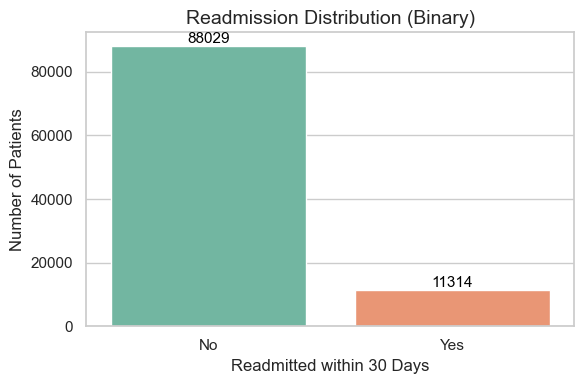

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#readmission counts after recoding
plt.figure(figsize=(6, 4))
sns.countplot(data=df1, x='readmitted_categorical', order=['No', 'Yes'], palette='Set2')

plt.title('Readmission Distribution (Binary)', fontsize=14)
plt.xlabel('Readmitted within 30 Days', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()


In [13]:
df1.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
       'readmitted_categorical', 'readmitted_numerical'],
      dtype='object')

In [51]:
#spearman correlation analysis to understand the correlation between numeric features and numeric target variable 'readmitted_numerical'
import scipy.stats as stats

numerical_features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]

spearman_corr = {}
for feature in numerical_features:
    corr, p_value = stats.spearmanr(df1[feature], df1['readmitted_numerical'])
    spearman_corr[feature] = {'Spearman Correlation': corr, 'P-Value': p_value}

spearman_df = pd.DataFrame(spearman_corr).T
print(spearman_df)

                          Spearman Correlation        P-Value
admission_type_id                    -0.015618   8.535047e-07
discharge_disposition_id              0.079315  2.343538e-138
admission_source_id                   0.014142   8.290688e-06
time_in_hospital                      0.052954   1.272036e-62
num_lab_procedures                    0.024123   2.862265e-14
num_procedures                       -0.004545   1.519593e-01
num_medications                       0.048020   8.340335e-52
number_outpatient                     0.034703   7.318077e-28
number_emergency                      0.064416   7.892428e-92
number_inpatient                      0.141488   0.000000e+00
number_diagnoses                      0.051531   2.140133e-59


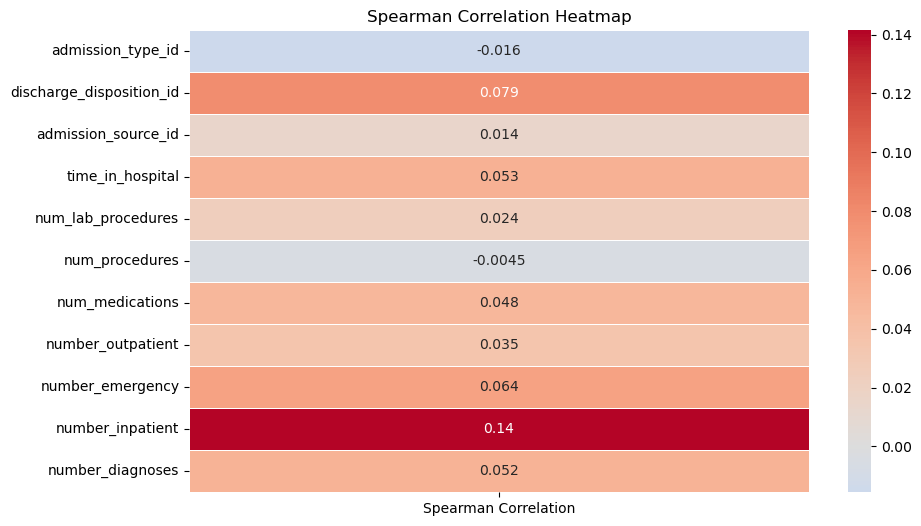

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_df[['Spearman Correlation']], annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

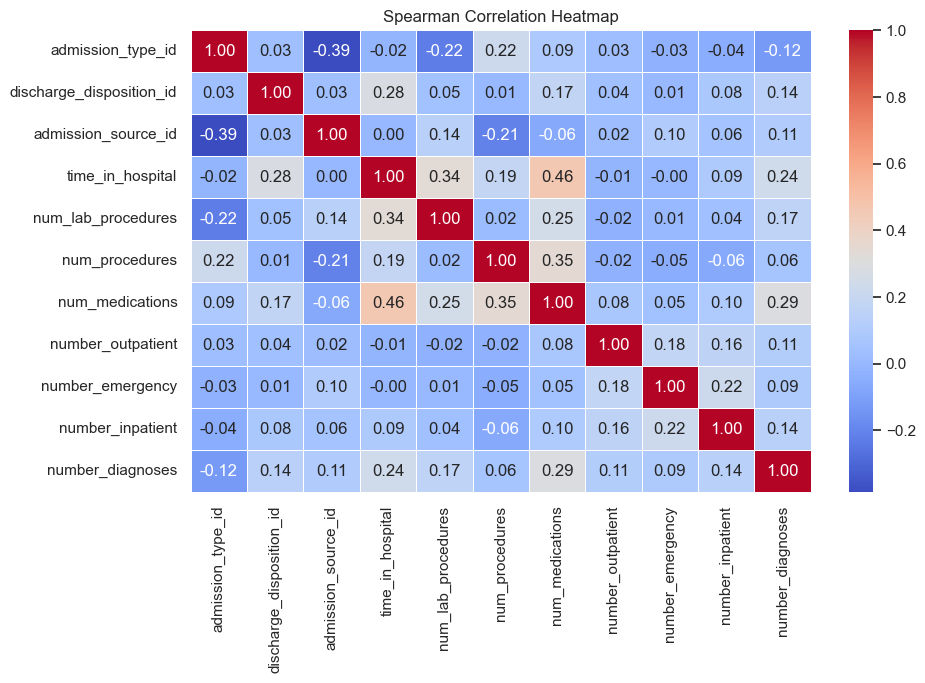

In [54]:
spearman_corr = df1[numerical_features].corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Spearman Correlation Heatmap")
plt.show()

In [17]:
#chi square analysis to understand the correlation between categorical features and categorical target variable 'readmitted_categorical'

from scipy.stats import chi2_contingency
categorical_columns = ['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1', 
                       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 
                       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
                       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

#Chi-Square Test
chi_square_results = {}
for col in categorical_columns:
    #contingency table
    contingency_table = pd.crosstab(df1['readmitted_categorical'], df1[col])

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = p

#results by p-value in ascending order
sorted_results = sorted(chi_square_results.items(), key=lambda x: x[1], reverse=False)
print("Chi-Square p-values for each feature (sorted in increasing order):")
for feature, p_value in sorted_results:
    print(f"{feature}: {p_value}")

Chi-Square p-values for each feature (sorted in increasing order):
diag_1: 1.3034362946904256e-99
insulin: 5.976352714810012e-43
medical_specialty: 3.5528282971650256e-42
age: 2.154571899465657e-24
diabetesMed: 3.0565329706809934e-16
metformin: 4.4297239355137045e-15
payer_code: 6.1224788560562755e-15
A1Cresult: 3.055224033497052e-09
change: 5.143967231957416e-09
race: 5.6165186632420864e-05
max_glu_serum: 0.0001683639539680958
repaglinide: 0.009049047557737794
glipizide: 0.009976580931355655
pioglitazone: 0.046534821642759544
glimepiride: 0.05004095428583268
rosiglitazone: 0.07931768278919932
glyburide: 0.09117347817085739
miglitol: 0.16733988458498883
acarbose: 0.21375920602260132
chlorpropamide: 0.42060988053610326
tolbutamide: 0.5401674264998402
gender: 0.597860099693178
nateglinide: 0.6855839578656386
tolazamide: 0.7451114082859556
glyburide-metformin: 0.7516213341154299
acetohexamide: 1.0
troglitazone: 1.0
examide: 1.0
citoglipton: 1.0
glipizide-metformin: 1.0
glimepiride-pioglit

**based on p values following columns are important according to decided threshold:**

age

insulin

medical_specialty

diag_1

diabetesMed

**according to spearman correlation (threshold: 0.05)**

number_inpatient

discharge_disposition_id

time_in_hospital

number_emergency

number_diagnoses

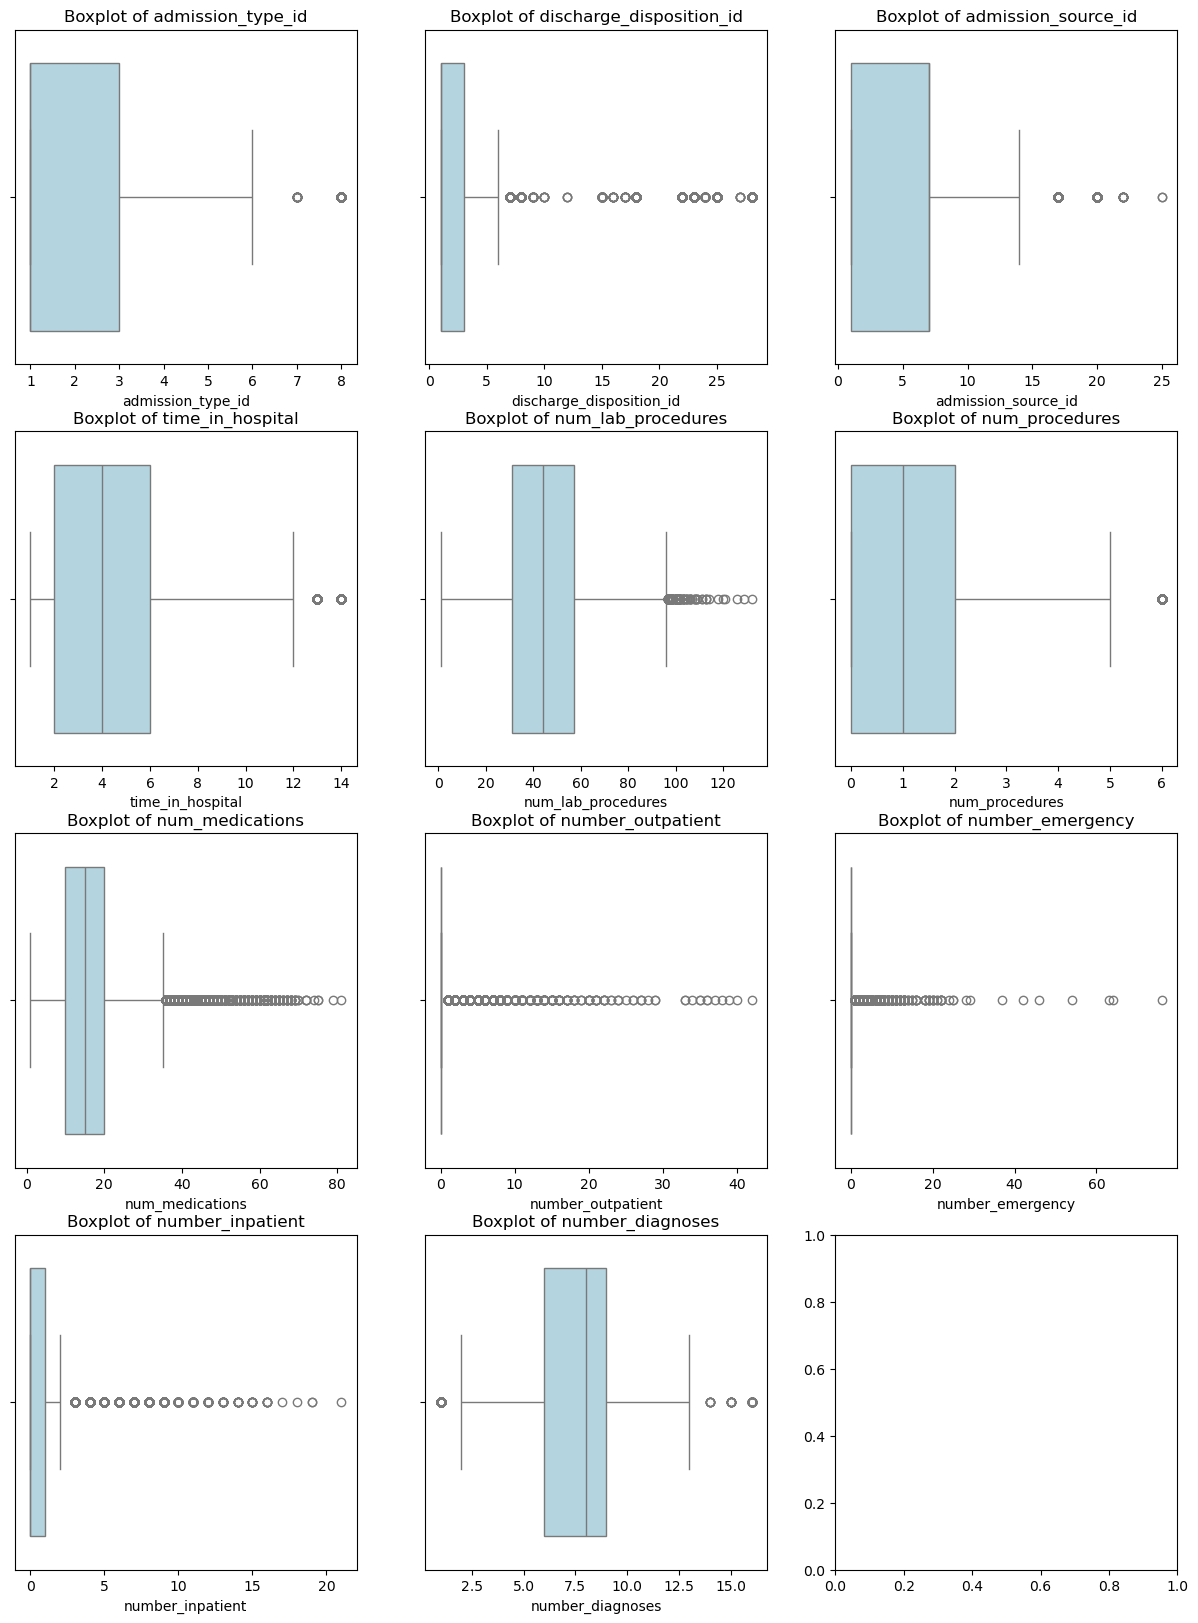

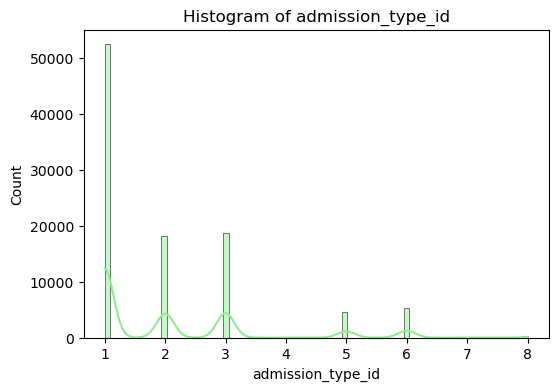

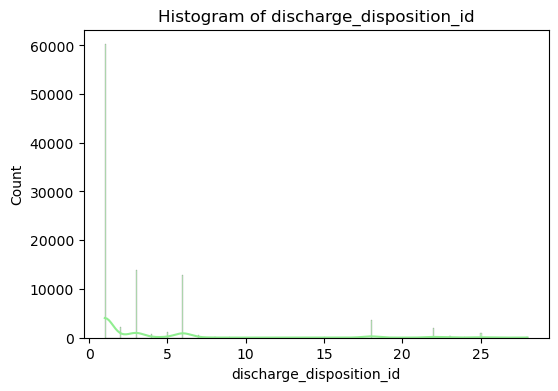

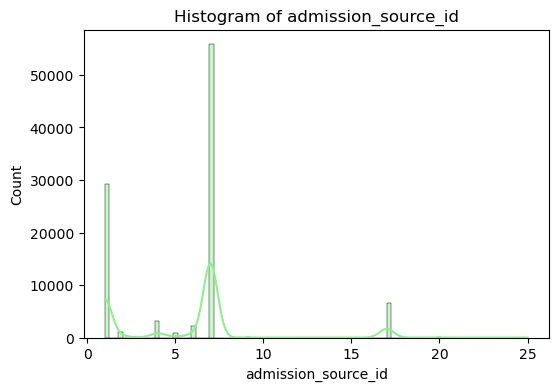

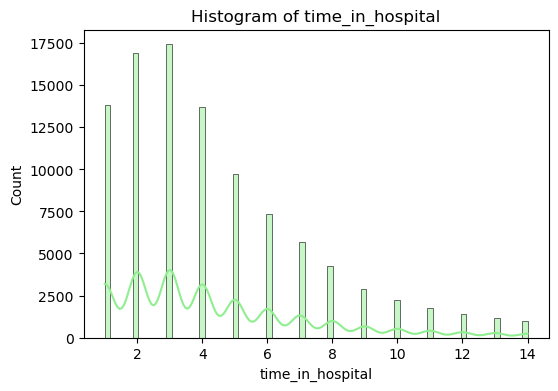

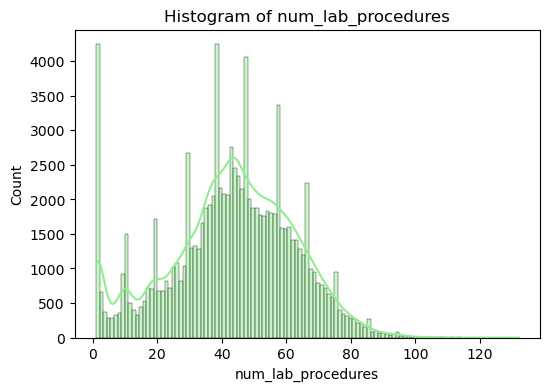

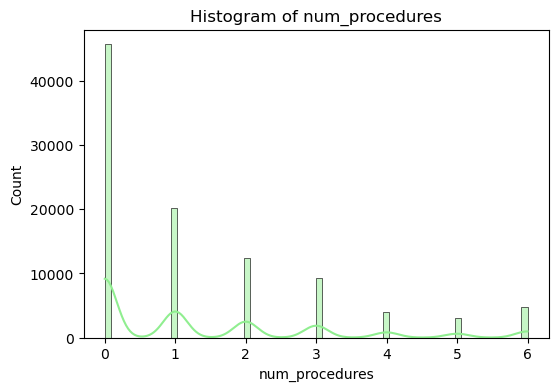

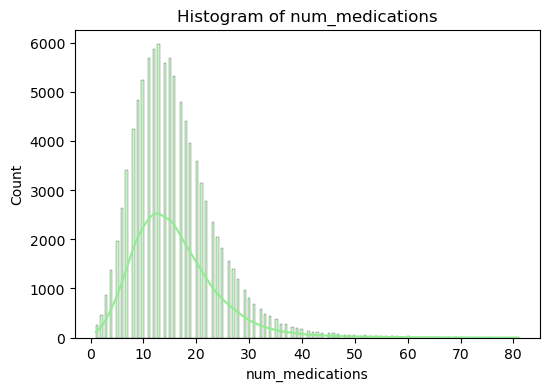

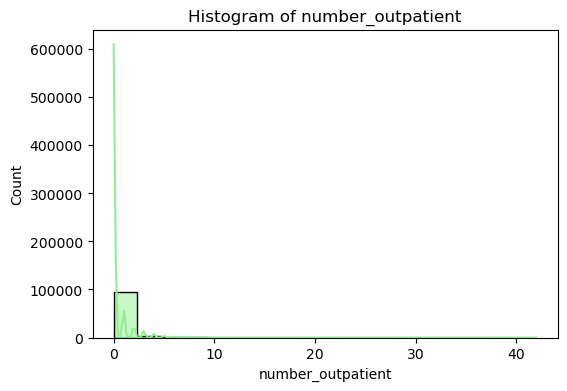

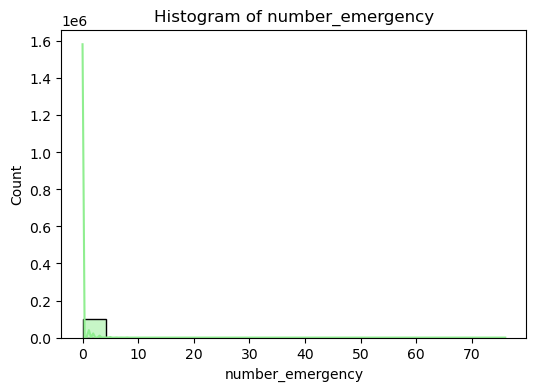

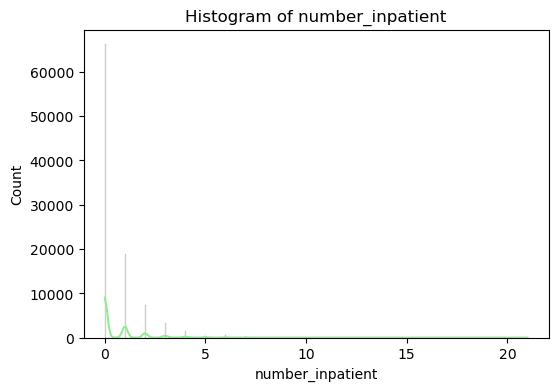

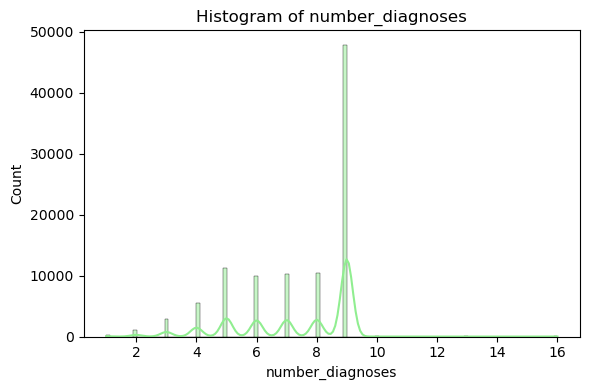

In [17]:
numeric_features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]

num_cols = 3
num_rows = (len(numeric_features) // num_cols) + (len(numeric_features) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    #boxplot
    sns.boxplot(x=df1[feature], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot of {feature}')
    
    #histogram 
    fig2, ax2 = plt.subplots(figsize=(6,4))
    sns.histplot(df1[feature], kde=True, ax=ax2, color='lightgreen')
    ax2.set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

In [16]:
#saving the preprocessed data in new dataframe df2
df2 = df1[['age', 'insulin', 'number_inpatient','medical_specialty', 'diag_1', 'diabetesMed','discharge_disposition_id', 'time_in_hospital', 'number_emergency', 'number_diagnoses','readmitted_numerical','readmitted_categorical']]

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
df2.columns

Index(['age', 'insulin', 'number_inpatient', 'medical_specialty', 'diag_1',
       'diabetesMed', 'discharge_disposition_id', 'time_in_hospital',
       'number_emergency', 'number_diagnoses', 'readmitted_numerical',
       'readmitted_categorical'],
      dtype='object')

**LSTM Model**

In [21]:
#selecting relevant features
categorical_features = ['insulin', 'medical_specialty', 'diag_1', 'diabetesMed']
numerical_features = ['age', 'number_inpatient', 'discharge_disposition_id', 'time_in_hospital', 'number_emergency', 'number_diagnoses']
target = 'readmitted_numerical'

#encoding categorical variables
label_encoder = LabelEncoder()
df2['age'] = label_encoder.fit_transform(df2['age'])

#one-Hot encoding for categorical features
df2 = pd.get_dummies(df2, columns=categorical_features)

# Scaling numerical features
scaler = StandardScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

C:\Users\akulc\AppData\Local\Temp\ipykernel_11136\292967363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = label_encoder.fit_transform(df2['age'])


In [22]:
#prepare data for LSTM
feature_columns = numerical_features + list(df2.columns[df2.columns.str.startswith(tuple(categorical_features))])
X = df2[feature_columns].values.astype(np.float32)
Y = df2[target].astype(np.int32).values
from imblearn.under_sampling import RandomUnderSampler

#initialize undersampler
undersample = RandomUnderSampler(random_state=42)

#flatten X temporarily for undersampling
X_resampled, y_resampled = undersample.fit_resample(X.reshape(X.shape[0], -1), Y)

#reshape X back to LSTM format
X_resampled = X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
print("Class distribution after undersampling:", np.bincount(y_resampled))


Class distribution after undersampling: [11314 11314]


In [23]:
print(X.shape)
X = X.reshape((X.shape[0], 1, X.shape[1]))


(99343, 800)


In [34]:
from keras.metrics import Recall
from keras.optimizers import Adam
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile Model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Recall(name='recall')])

In [35]:
#train Model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5997 - loss: 0.6761 - recall: 0.6343 - val_accuracy: 0.6116 - val_loss: 0.6530 - val_recall: 0.5671
Epoch 2/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6144 - loss: 0.6511 - recall: 0.6013 - val_accuracy: 0.6105 - val_loss: 0.6511 - val_recall: 0.6021
Epoch 3/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6229 - loss: 0.6452 - recall: 0.6263 - val_accuracy: 0.6078 - val_loss: 0.6501 - val_recall: 0.5953
Epoch 4/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6213 - loss: 0.6448 - recall: 0.6234 - val_accuracy: 0.6129 - val_loss: 0.6509 - val_recall: 0.5466
Epoch 5/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6268 - loss: 0.6413 - recall: 0.6229 - val_accuracy: 0.6030 - val_loss: 0.6518 - val_recall: 0.6344
Epoch 6/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6274 - loss: 0.6383 - recall: 0.6453 - val_accuracy: 0.6080 - val_loss: 0.6528 - val_recall: 0.5794
Epo

In [37]:
#evaluate Model
results = model.evaluate(X_test, y_test)
print(f"Results: {results}")  


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6026 - loss: 0.7124 - recall: 0.6130
Results: [0.7060808539390564, 0.6027397513389587, 0.608458399772644]


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


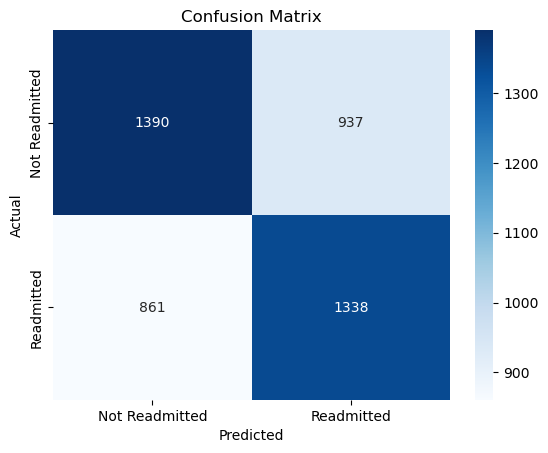

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      2327
           1       0.59      0.61      0.60      2199

    accuracy                           0.60      4526
   macro avg       0.60      0.60      0.60      4526
weighted avg       0.60      0.60      0.60      4526



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'], yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
class_report = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


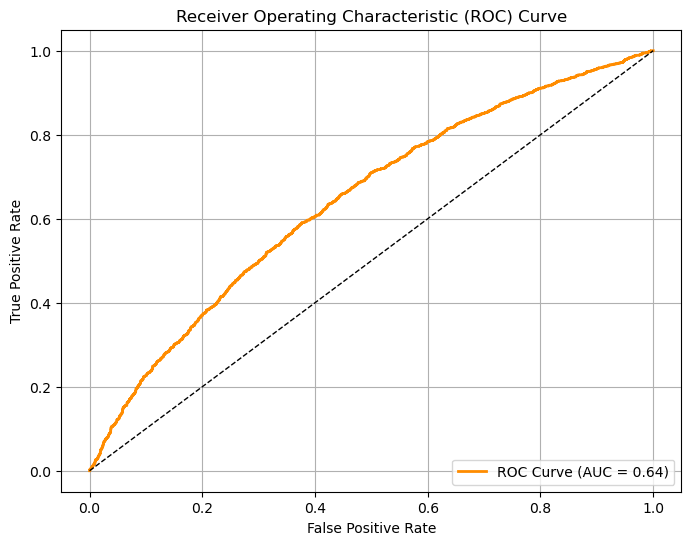

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

#predicted probabilities 
y_pred_probs = model.predict(X_test).ravel()  

#compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**KNN Model**

In [18]:
df3 = df1[['age', 'insulin', 'number_inpatient', 'medical_specialty', 'diag_1', 
           'diabetesMed', 'discharge_disposition_id', 'time_in_hospital', 
           'number_emergency', 'number_diagnoses', 
           'readmitted_numerical', 'readmitted_categorical']].copy()

In [19]:
categorical_features = ['age', 'insulin', 'medical_specialty', 'diag_1', 'diabetesMed']
numerical_features = ['number_inpatient', 'discharge_disposition_id', 'time_in_hospital', 
                      'number_emergency', 'number_diagnoses']
target = 'readmitted_numerical'

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['age']:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    label_encoders[col] = le

# One-hot encode remaining categorical features
df3 = pd.get_dummies(df3, columns=['insulin', 'medical_specialty', 'diag_1', 'diabetesMed'])

In [21]:
scaler = StandardScaler()
df3[numerical_features] = scaler.fit_transform(df3[numerical_features])

In [22]:
X = df3.drop(columns=['readmitted_numerical', 'readmitted_categorical'])  # Drop both target and redundant label
y = df3['readmitted_numerical']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

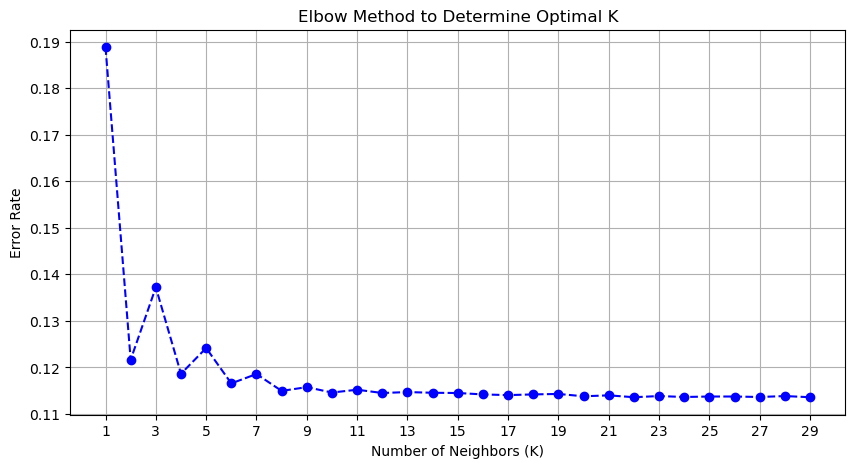

In [66]:
#finding optimal k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rates = []
k_values = range(1, 30) 

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)  
    error_rates.append(error)

#Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Determine Optimal K')
plt.xticks(range(1, 30, 2))
plt.grid()
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

optimal_k = 7  
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with K={optimal_k}: {accuracy:.4f}")

Accuracy with K=7: 0.7746


Accuracy with K=7: 0.7746
Precision with K=7: 0.1738
Recall with K=7: 0.2607
F1-Score with K=7: 0.2086


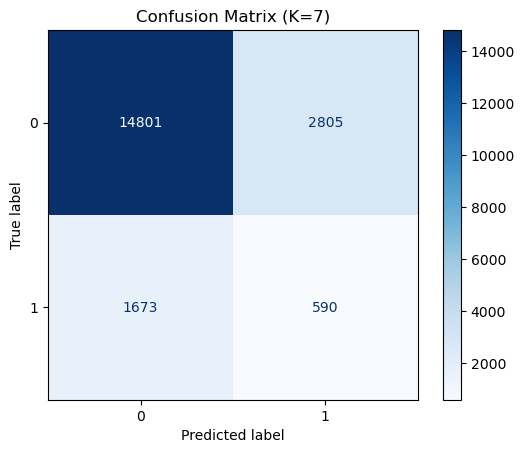

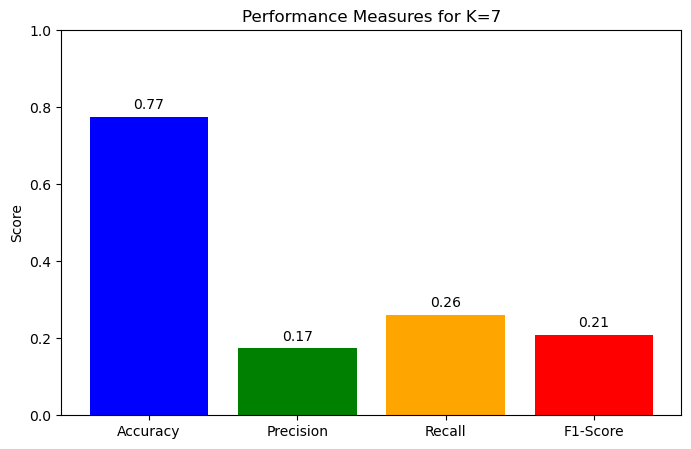

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#performance measures
print(f"Accuracy with K={optimal_k}: {accuracy:.4f}")
print(f"Precision with K={optimal_k}: {precision:.4f}")
print(f"Recall with K={optimal_k}: {recall:.4f}")
print(f"F1-Score with K={optimal_k}: {f1:.4f}")

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (K={optimal_k})")
plt.show()

#bar chart of performance measures
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.0, 1.0) 
plt.title(f"Performance Measures for K={optimal_k}")
plt.ylabel("Score")
for i in range(len(values)):
    plt.text(i, values[i] + 0.02, f"{values[i]:.2f}", ha='center', fontsize=10)
plt.show()

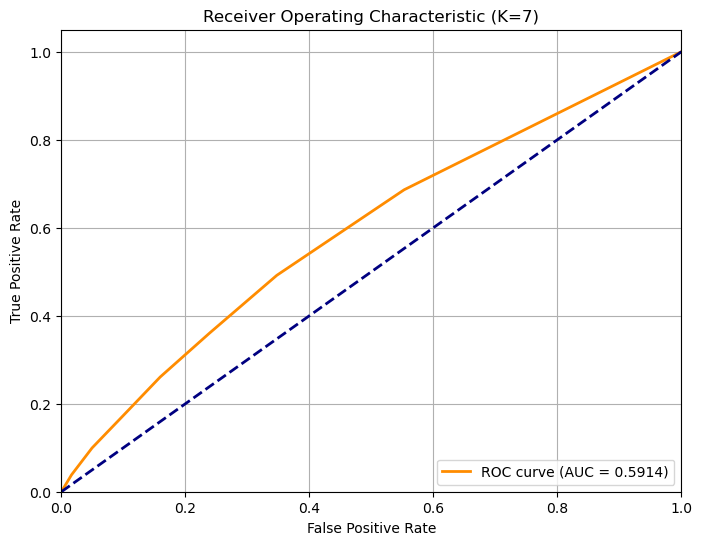

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = knn.predict_proba(X_test)[:, 1]

#calculate FPR, TPR for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Receiver Operating Characteristic (K={optimal_k})")
plt.legend(loc="lower right")
plt.grid()
plt.show()


**Logistic Regression Model**

In [ ]:
categorical_features = ['insulin', 'medical_specialty', 'diag_1', 'diabetesMed']
numerical_features = ['age', 'number_inpatient', 'discharge_disposition_id', 'time_in_hospital', 'number_emergency', 'number_diagnoses']
target = 'readmitted_numerical'


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#define predictors and target
predictors = [
    'discharge_disposition_id', 'time_in_hospital', 'number_emergency', 
    'number_diagnoses', 'age', 'insulin', 'medical_specialty', 'diag_1', 'diabetesMed', 'number_inpatient'
]
target = 'readmitted_numerical'

train_df, test_df = train_test_split(df1, test_size=0.25, random_state=42, stratify=df1[target])

num_features = ['discharge_disposition_id', 'time_in_hospital', 'number_emergency', 'number_diagnoses', 'number_inpatient']
cat_features = ['age', 'insulin', 'medical_specialty', 'diag_1', 'diabetesMed']

#One-Hot Encoding for categorical variables 
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_cat_encoded = encoder.fit_transform(train_df[cat_features])
test_cat_encoded = encoder.transform(test_df[cat_features])

X_train = np.hstack((train_df[num_features].values, train_cat_encoded))
X_test = np.hstack((test_df[num_features].values, test_cat_encoded))
y_train = train_df[target]
y_test = test_df[target]

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

custom_weights = {0: 1, 1: 5}  #Assign a higher weight to minority class

model = LogisticRegression(max_iter=1000, random_state=42, class_weight=custom_weights)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.8096

Confusion Matrix:
 [[19329  2678]
 [ 2050   779]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     22007
           1       0.23      0.28      0.25      2829

    accuracy                           0.81     24836
   macro avg       0.56      0.58      0.57     24836
weighted avg       0.83      0.81      0.82     24836



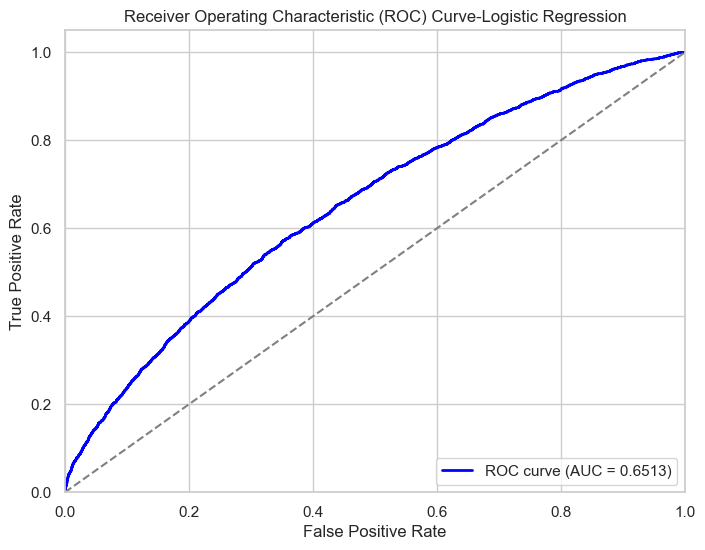

In [56]:
from sklearn.metrics import roc_curve, auc

#predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  #Probabilities for class 1

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve-Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**Decision Tree Classifier**

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df4 = df1.copy()

#selecting the predictor variables
features = [
    'discharge_disposition_id', 'time_in_hospital', 'number_emergency',
    'number_diagnoses', 'age', 'insulin', 'medical_specialty', 'diag_1', 'diabetesMed','number_inpatient'
]

target = 'readmitted_numerical'  #Target variable

train_df, test_df = train_test_split(df4, test_size=0.25, random_state=42, stratify=df4[target])


cat_features = ['age', 'insulin', 'medical_specialty', 'diag_1', 'diabetesMed']
num_features = ['discharge_disposition_id', 'time_in_hospital', 'number_emergency', 'number_diagnoses','number_inpatient']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_cat_encoded = encoder.fit_transform(train_df[cat_features])
test_cat_encoded = encoder.transform(test_df[cat_features])

#standardizing numerical features
scaler = StandardScaler()
train_num_scaled = scaler.fit_transform(train_df[num_features])
test_num_scaled = scaler.transform(test_df[num_features])

X_train = np.hstack((train_num_scaled, train_cat_encoded))
X_test = np.hstack((test_num_scaled, test_cat_encoded))
y_train = train_df[target]
y_test = test_df[target]

custom_weights = {0: 1, 1: 5}
dt_model = DecisionTreeClassifier(random_state=42, max_depth=15,class_weight=custom_weights)  # Adjust max_depth for better performance
dt_model.fit(X_train, y_train)

#Predictions
y_pred = dt_model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8263

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     22007
           1       0.23      0.23      0.23      2829

    accuracy                           0.83     24836
   macro avg       0.57      0.57      0.57     24836
weighted avg       0.83      0.83      0.83     24836



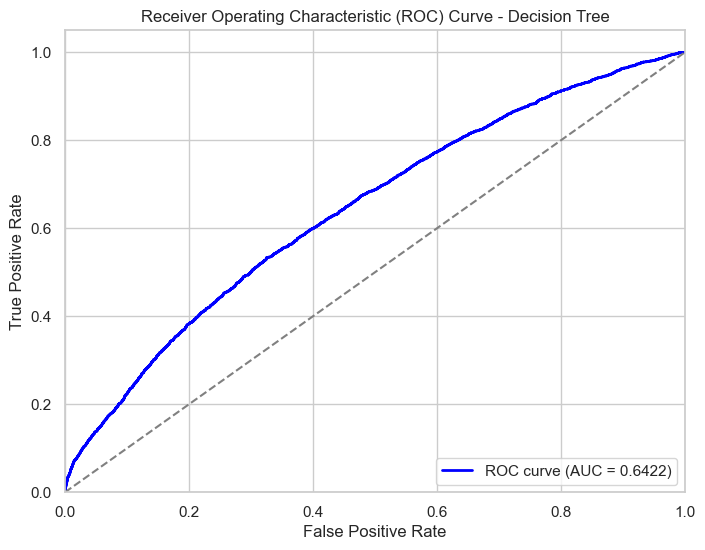

In [58]:
#predicted probabilities for the positive class (1)
y_probs = model.predict_proba(X_test)[:, 1]  

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  #Random classifier baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

**LightGBM Model**

In [59]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 660.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 1.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.5 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.1 MB/s eta 0:00:00


In [60]:
import lightgbm as lgb  # Import LightGBM

predictors = [
    'discharge_disposition_id', 'time_in_hospital', 'number_emergency',
    'number_diagnoses', 'age', 'insulin', 'medical_specialty', 'diag_1', 'diabetesMed'
]
target = 'readmitted_numerical'

train_df, test_df = train_test_split(df1, test_size=0.30, random_state=42, stratify=df1[target])

num_features = ['discharge_disposition_id', 'time_in_hospital', 'number_emergency', 'number_diagnoses']
cat_features = ['age', 'insulin', 'medical_specialty', 'diag_1', 'diabetesMed']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_cat_encoded = encoder.fit_transform(train_df[cat_features])
test_cat_encoded = encoder.transform(test_df[cat_features])

scaler = StandardScaler()
train_num_scaled = scaler.fit_transform(train_df[num_features])
test_num_scaled = scaler.transform(test_df[num_features])

X_train = np.hstack((train_num_scaled, train_cat_encoded))
X_test = np.hstack((test_num_scaled, test_cat_encoded))
y_train = train_df[target]
y_test = test_df[target]



#Build LightGBM model
custom_weights = {0: 1, 1: 5}
model = lgb.LGBMClassifier(random_state=42,class_weight=custom_weights)  # Initialize LightGBM classifier
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

[LightGBM] [Info] Number of positive: 7920, number of negative: 61620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 69540, number of used features: 324
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.391227 -> initscore=-0.442157
[LightGBM] [Info] Start training from score -0.442157
Model Accuracy: 0.8365

Confusion Matrix:
 [[24223  2186]
 [ 2686   708]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     26409
           1       0.24      0.21      0.23      3394

    accuracy                           0.84     29803
   macro avg       0.57      0.56      0.57     29803
weighted avg       0.83      0.84      0.83     29803



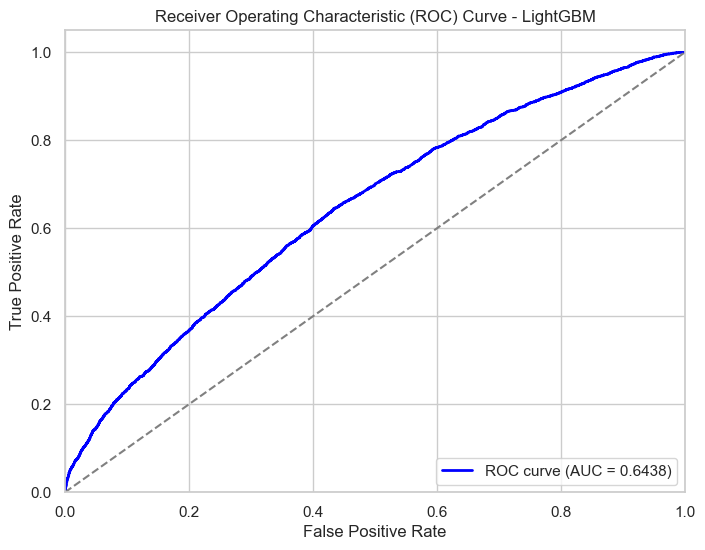

In [61]:
y_probs = model.predict_proba(X_test)[:, 1]  

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()

Recall Score Table:
                 Model  Recall
0  Logistic Regression    0.28
1                 LSTM    0.61
2                  KNN    0.26
3             LightGBM    0.21
4        Decision Tree    0.23


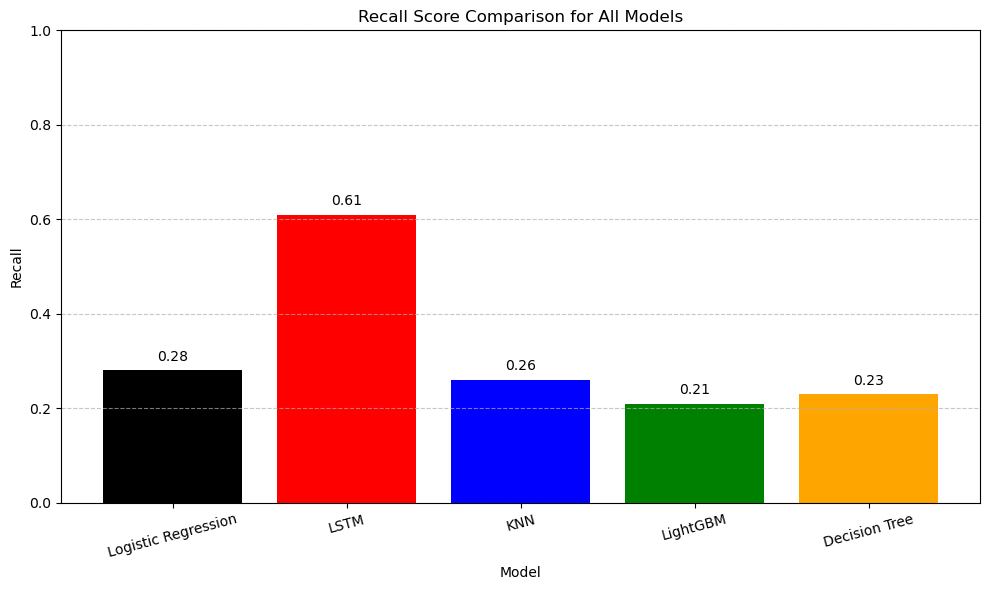

In [ ]:
model_performance = {
    'Model': [
        'Logistic Regression', 
        'LSTM', 
        'KNN', 
        'LightGBM', 
        'Decision Tree'
    ],
    'Recall': [
        0.28,  
        0.61,  
        0.26,  
        0.21,  
        0.23   
    ]
}

recall_df = pd.DataFrame(model_performance)

plt.figure(figsize=(10, 6))
colors = ['black', 'red', 'blue', 'green', 'orange']
bars = plt.bar(recall_df['Model'], recall_df['Recall'], color=colors)

plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Recall Score Comparison for All Models")
plt.ylim(0, 1.0)
plt.xticks(rotation=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f"{height:.2f}", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

print("Recall Score Table:")
print(recall_df)

plt.show()